In [205]:
#In this part of the crime analysis we consider the crimes in chicago from 2006-2010 
#we use rd to read data from the cleaned csv file.
import pandas as pd
import numpy as np
rd = pd.read_csv('/Users/sriharigururaj/Documents/SEM3/Big Data/Research paper/crimes06-10.csv')
rd.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11039126,JA371798,1/1/2007 0:01,009XX N DRAKE AVE,266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,27.0,23.0,2,NaN,NaN,2007,10/21/2017 15:44,NaN,NaN,NaN
1,11042930,JA374409,1/1/2010 0:01,080XX S MARSHFIELD AVE,266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,21.0,71.0,2,NaN,NaN,2010,8/5/2017 15:50,NaN,NaN,NaN
2,11042861,JA374153,1/1/2007 0:01,026XX W 21ST ST,266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,28.0,30.0,2,NaN,NaN,2007,10/21/2017 15:44,NaN,NaN,NaN
3,11042914,JA374555,1/1/2008 0:01,011XX S WHIPPLE ST,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,...,28.0,29.0,2,NaN,NaN,2008,8/19/2017 15:48,NaN,NaN,NaN
4,11042938,JA377035,1/1/2007 0:01,019XX N HARLEM AVE,266,CRIM SEXUAL ASSAULT,PREDATORY,DAY CARE CENTER,False,False,...,36.0,25.0,2,NaN,NaN,2007,8/19/2017 15:48,NaN,NaN,NaN


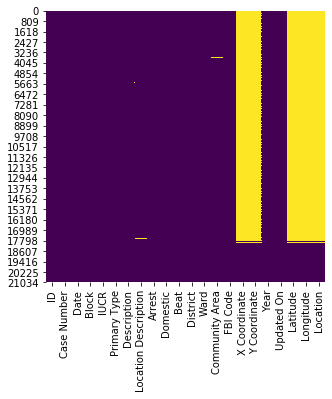

In [206]:
import matplotlib.pyplot as plot #importing plots library 
import seaborn as sea
plot.figure(figsize=(5,5))
sea.heatmap(rd.isnull(), cbar = False, cmap = 'viridis')

In [207]:
#in this section we are reading the csv file and importing the crimes for which we are considering the counts of each type of crime.
#this givess a better analysis of data
rd = rd.dropna()
rd = rd.drop(['ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)
pd.value_counts(rd['Primary Type'])[:10]

THEFT                         1616
BATTERY                        942
ASSAULT                        640
NARCOTICS                      114
BURGLARY                       113
ROBBERY                        101
DECEPTIVE PRACTICE              82
CRIMINAL DAMAGE                 75
CRIM SEXUAL ASSAULT             23
OFFENSE INVOLVING CHILDREN      21
Name: Primary Type, dtype: int64

In [208]:
pd.value_counts(rd['Location Description'])[:10] #top 10 value counts available in terms of location and the type of Crime

STREET                1715
SIDEWALK               519
RESIDENCE              439
OTHER                  361
APARTMENT              230
ALLEY                  153
RESTAURANT              54
BAR OR TAVERN           36
GROCERY FOOD STORE      33
CTA BUS                 32
Name: Location Description, dtype: int64

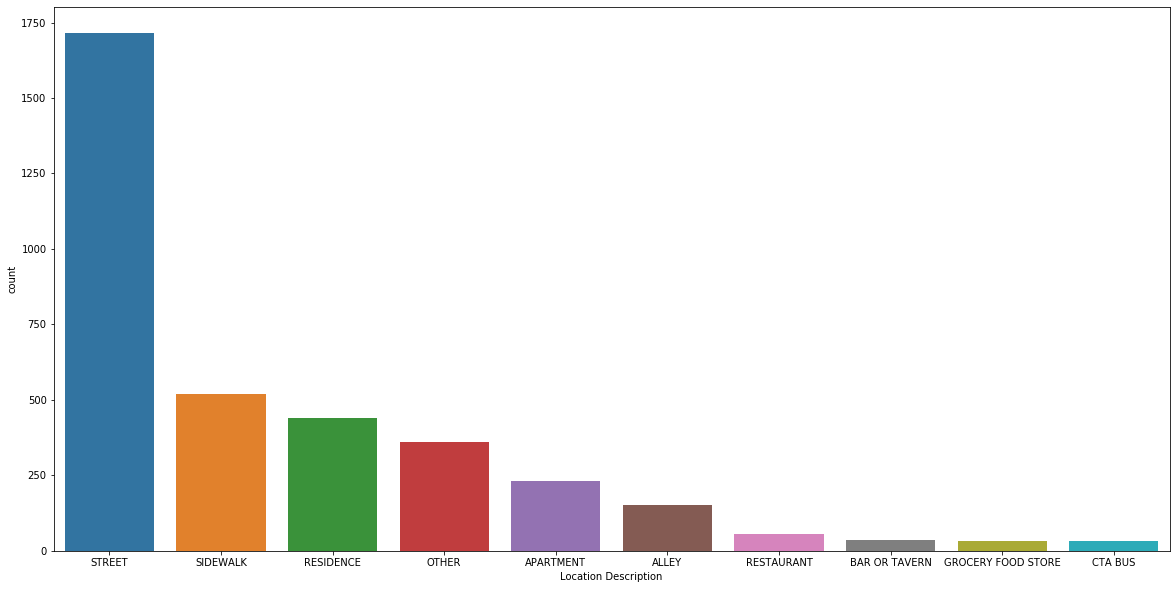

In [209]:
#plotting of the top 5 crimes
plot.figure(figsize = (20, 10)) #plotting the crimes for the top 5
sea.countplot(x= 'Location Description', data = rd, order = rd['Location Description'].value_counts().iloc[0:10].index)

In [210]:
#position of where the crimes are committed 
#importing cartoDb to show google maps in real time with areas of crime
#importing library folim for display of map
import folium
import matplotlib.pyplot as plt
import seaborn as sea
c_m = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB Positron")

In [211]:
locs = rd.groupby('Community Area').first()

In [212]:
new_locs = locs.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [213]:
new_locs.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.970515,-87.836651,ALLEY,False
1.0,42.019461,-87.682001,STREET,False
2.0,41.985177,-87.698607,STREET,False
3.0,41.968582,-87.654815,RETAIL STORE,True
4.0,41.971153,-87.688991,APARTMENT,False


In [214]:
#Indexing location with respective community
for i in range(len(new_locs)):
    lat = new_locs.iloc[i][0]
    long = new_locs.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locs.index[i],
                               new_locs.iloc[i][-1],
                               new_locs.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(c_m)

In [215]:
c_m

In [216]:
#Location of each crime and its unique location
uniq_locs = rd['Location'].value_counts()

In [217]:
uniq_locs.index

Index(['(42.019399237, -87.675049485)', '(41.909307068, -87.80576669)',
       '(41.88233367, -87.627841791)', '(41.993892087, -87.660388215)',
       '(36.619446395, -91.686565684)', '(41.946159169, -87.655678044)',
       '(41.87178962, -87.633564301)', '(41.893541578, -87.629701805)',
       '(41.89652481, -87.639211587)', '(41.893179585, -87.634686145)',
       ...
       '(42.016488492, -87.705067245)', '(41.899899476, -87.729911073)',
       '(41.774160897, -87.70302752)', '(41.945863902, -87.767912706)',
       '(42.019395373, -87.674376067)', '(41.965211426, -87.723051646)',
       '(41.943731737, -87.640703062)', '(41.833700417, -87.68519367)',
       '(41.939919008, -87.65338811)', '(41.854842863, -87.68191159)'],
      dtype='object', length=3551)

In [218]:
crime_count = pd.DataFrame({"Raw_String" : uniq_locs.index, "ValueCount":uniq_locs})
crime_count.index = range(len(uniq_locs))
crime_count.head()

,Raw_String,ValueCount
0,"(42.019399237, -87.675049485)",33
1,"(41.909307068, -87.80576669)",16
2,"(41.88233367, -87.627841791)",5
3,"(41.993892087, -87.660388215)",5
4,"(36.619446395, -91.686565684)",5


In [219]:
#extraction of location where each crime which was committed
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [220]:
crime_count['LocationCoord'] = crime_count['Raw_String'].apply(Location_extractor)
crime_count  = crime_count.drop('Raw_String', axis = 1)

In [221]:
crime_map = folium.Map(location=[41.895140898, -87.624255632], #total crime rate
                        zoom_start=11,
                        tiles="CartoDB Positron")

for index in range(500):
    latitude = crime_count['LocationCoord'].iloc[index][0]
    longitude = crime_count['LocationCoord'].iloc[index][1]
    radius = crime_count['ValueCount'].iloc[index] / 45
    
    if crime_count['ValueCount'].iloc[index] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crime_count['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [latitude, longitude], popup= popup_text,radius = radius, color = color, fill = True).add_to(crime_map)

In [222]:
crime_map

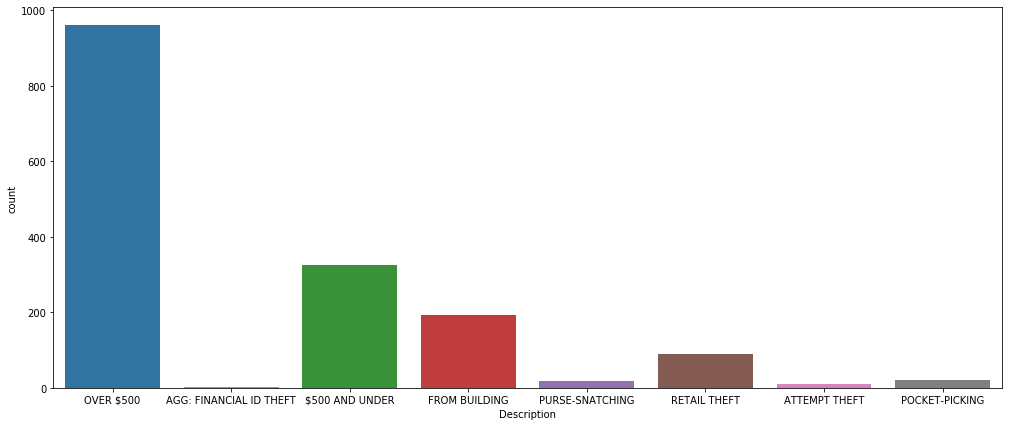

In [223]:
rdt = rd[rd['Primary Type'] == 'THEFT'] #give a look at the locations where thefts happened
plot.figure(figsize = (17, 7))
sea.countplot(x = rdt['Description'])

In [224]:
#different types of thefts and its count
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)#sorted array of the count
rdt_data.head()

,Counts,Description
0,960,OVER $500
1,326,$500 AND UNDER
2,192,FROM BUILDING
3,89,RETAIL THEFT
4,21,POCKET-PICKING


In [225]:
#calculating thefts and its counts monthly in descending order
%%time
rdt['Date'] = pd.to_datetime(rdt['Date'])
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)
theft_in_months = pd.DataFrame({"thefts" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])
theft_in_months.head()

UsageError: Line magic function `%%time` not found.


In [ ]:
#plot of thefts and its average
plt.figure(figsize = (12,8))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='green', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts according to months', fontsize=14)
plt.xlabel('Total months')
plt.legend(prop={'size':15})
plt.tick_params(labelsize=15);#this gives a graph for the thefts according to the month

In [ ]:
print(max(rdt['Date']))
print(min(rdt['Date']))

In [226]:
rdt['Date'].iloc[0].date()

AttributeError: 'str' object has no attribute 'date'

In [ ]:
rd_td = rdt['Location']
rd_td.index = rdt['Date']
resampled = rd_td.resample('D')
rd_td['MEAN'] = resampled.size().mean()
rd_td['STD'] = resampled.size().std()

In [227]:
UCL = rd_td['MEAN'] + 3 * rd_td['STD']
LCL = rd_td['MEAN'] -  3 * rd_td['STD']

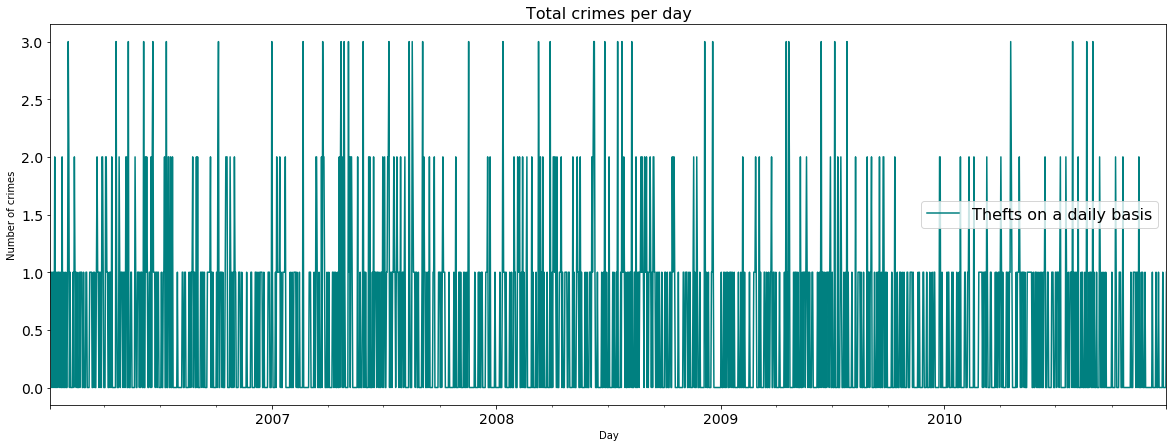

In [228]:
plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'teal')
plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

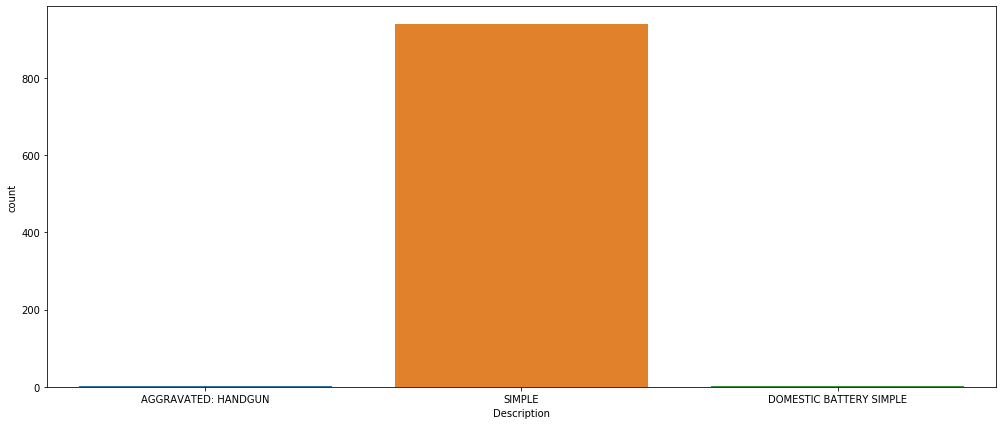

In [229]:
rdt = rd[rd['Primary Type'] == 'BATTERY'] #battery crimes
plot.figure(figsize = (17, 7))
sea.countplot(x = rdt['Description'])

In [230]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)#plotting the crimes 
rdt_data.head()

,Counts,Description
0,938,SIMPLE
1,3,DOMESTIC BATTERY SIMPLE
2,1,AGGRAVATED: HANDGUN


In [231]:
#different type of batter charges
rdt['Date'] = pd.to_datetime(rdt['Date'])

/Users/sriharigururaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [232]:
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)

/Users/sriharigururaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [233]:
battery_in_months = pd.DataFrame({"Battery" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))

In [234]:
battery_in_months.fillna(0, inplace=True)
battery_in_months = battery_in_months.sort_values(['month'], ascending=[1])

In [235]:
battery_in_months.head()

,Battery,month
8,88.0,1
9,78.0,2
5,90.0,3
2,66.0,4
3,86.0,5


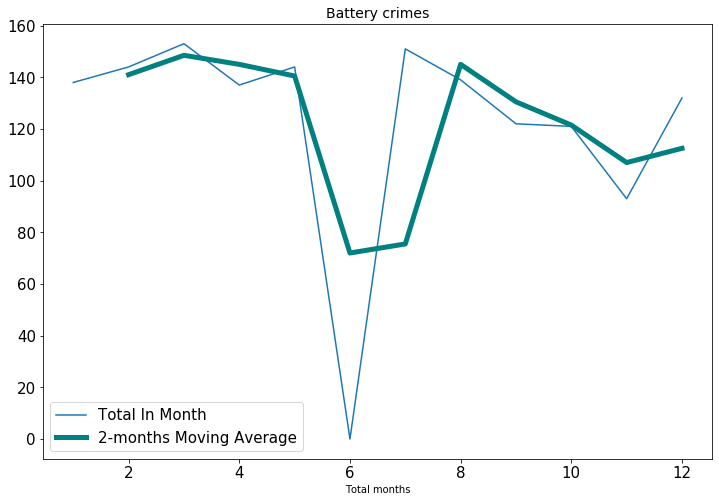

In [236]:
plt.figure(figsize = (12,8))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='teal', linewidth=5, label='2-months Moving Average' )

plt.title('Battery crimes', fontsize=14)
plt.xlabel('Total months')
plt.legend(prop={'size':15})
plt.tick_params(labelsize=15);

In [237]:
print(max(rdt['Date']))
print(min(rdt['Date']))

2010-12-29 09:45:00
2006-01-04 14:40:00


In [238]:
rdt['Date'].iloc[0].date()

datetime.date(2008, 3, 29)

In [239]:
rd_td = rdt['Location']
rd_td.index = rdt['Date']
resampled = rd_td.resample('D')
rd_td['MEAN'] = resampled.size().mean()
rd_td['STD'] = resampled.size().std()

/Users/sriharigururaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/sriharigururaj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/sriharigururaj/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [240]:
UCL = rd_td['MEAN'] + 3 * rd_td['STD']
LCL = rd_td['MEAN'] -  3 * rd_td['STD']

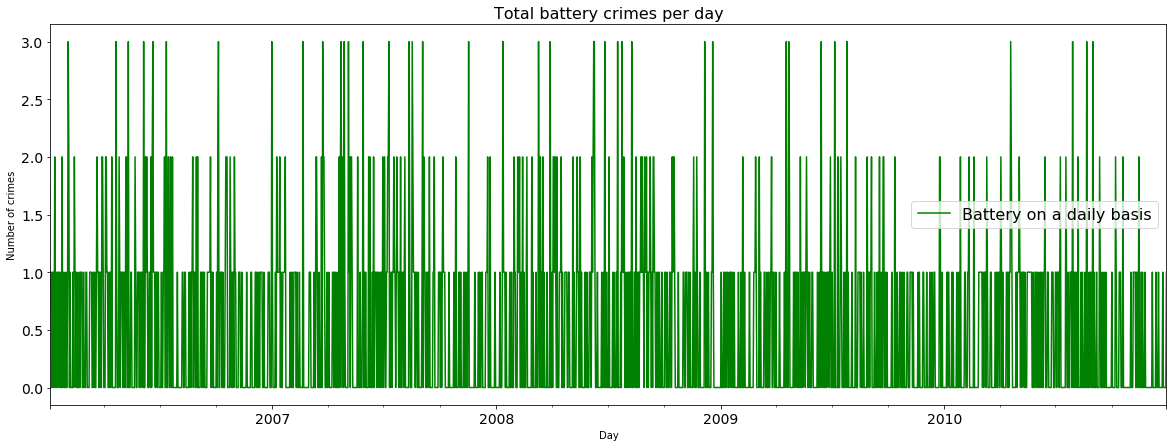

In [241]:
plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Battery on a daily basis", color = 'green')
plt.title('Total battery crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

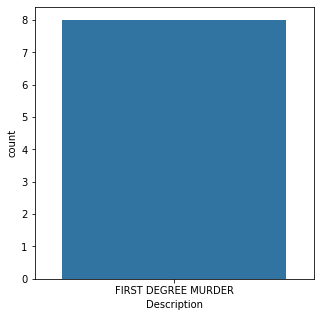

In [242]:
rdt = rd[rd['Primary Type'] == 'HOMICIDE'] #homocide crimes
plot.figure(figsize = (5, 5))
sea.countplot(x = rdt['Description'])

In [243]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,8,FIRST DEGREE MURDER


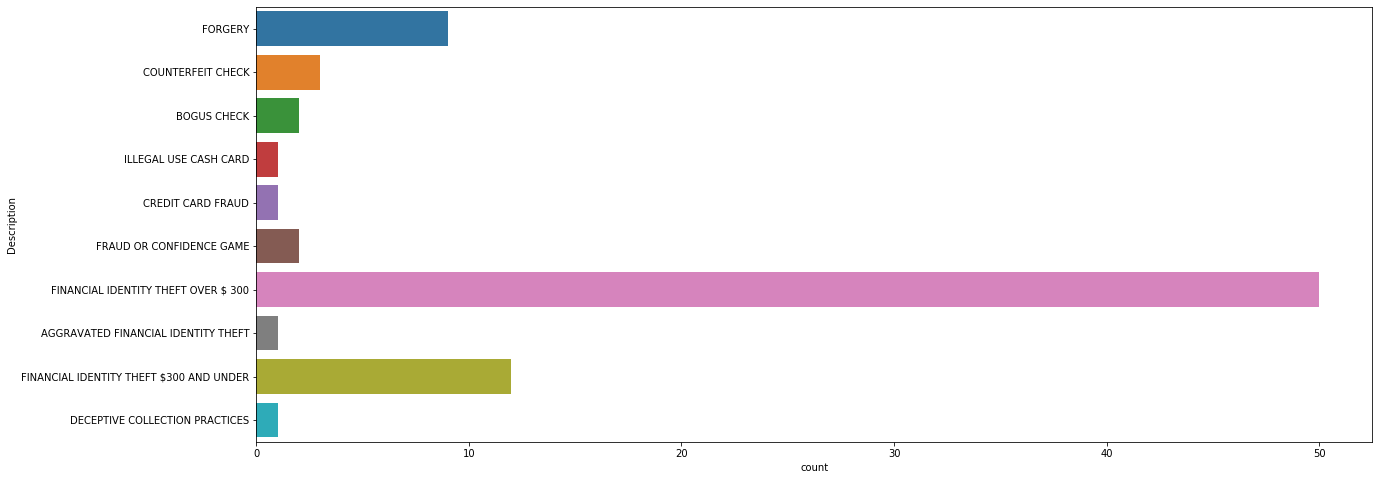

In [244]:
rdt = rd[rd['Primary Type'] == 'DECEPTIVE PRACTICE'] #crimes according to deceptive practices
plot.figure(figsize = (20, 8))
sea.countplot(y = rdt['Description'])

In [245]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,50,FINANCIAL IDENTITY THEFT OVER $ 300
1,12,FINANCIAL IDENTITY THEFT $300 AND UNDER
2,9,FORGERY
3,3,COUNTERFEIT CHECK
4,2,FRAUD OR CONFIDENCE GAME


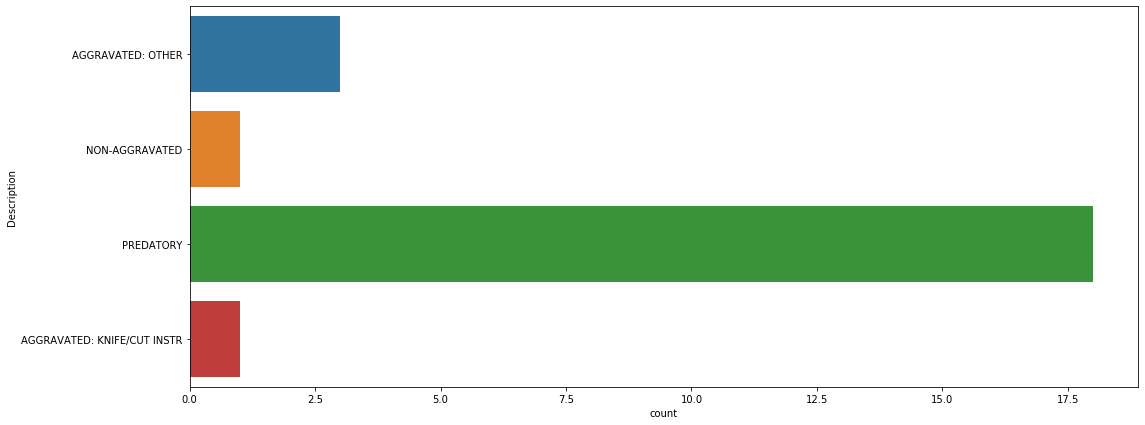

In [246]:
rdt = rd[rd['Primary Type'] == 'CRIM SEXUAL ASSAULT'] #crimes according to sexual assualt
plot.figure(figsize = (17, 7))
sea.countplot(y = rdt['Description'])

In [247]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,18,PREDATORY
1,3,AGGRAVATED: OTHER
2,1,NON-AGGRAVATED
3,1,AGGRAVATED: KNIFE/CUT INSTR


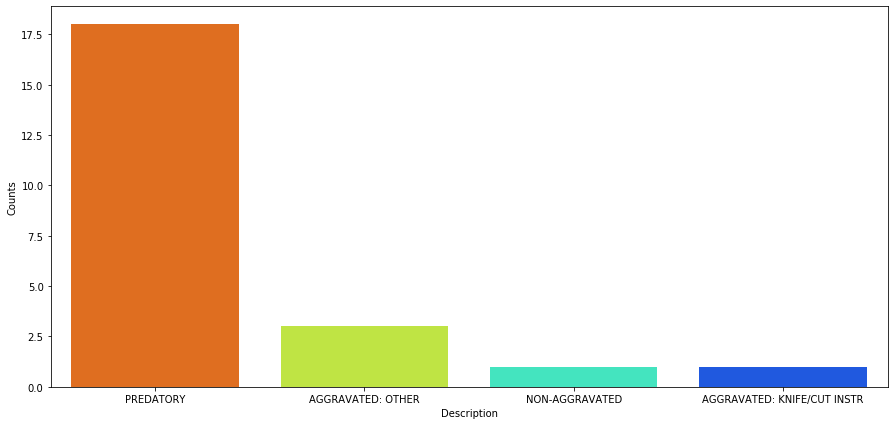

In [248]:
plt.figure(figsize = (15, 7))
sea.barplot(x ="Description", y = "Counts", data = rdt_data, palette="jet_r")

In [249]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,18,PREDATORY
1,3,AGGRAVATED: OTHER
2,1,NON-AGGRAVATED
3,1,AGGRAVATED: KNIFE/CUT INSTR


In [250]:
print(max(rdt['Date']))
print(min(rdt['Date']))

9/17/2009 0:00
1/1/2009 0:01
